# GAMASI: Generic Asynchronous Multi-Agent Simulation Invoker

## Running simulation

In [1]:
import numpy as np

from src.Lab import Lab

lab = Lab()

In [2]:
simulation = lab.experiment(
    height=20, width=20,
    initial_population_count=40,
    max_total_duration=10, max_simulation_duration=4
)

Generating universe...	: Done in 0.000 s


Running simulation	: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]

Interrupting population	: 102...
Simulation succeed...	: Returning data... Done in 4.170 s


## Analysis

### Statistics

#### Gathering & computing

In [3]:
#stats = lab.gather_data(simulation)

In [4]:
#stats["agents_statistics"].to_csv("results/stats.csv")

#### Plotting some stats

In [5]:
#lab.plot_generation_stats(stats)

### Timelines

#### Population count

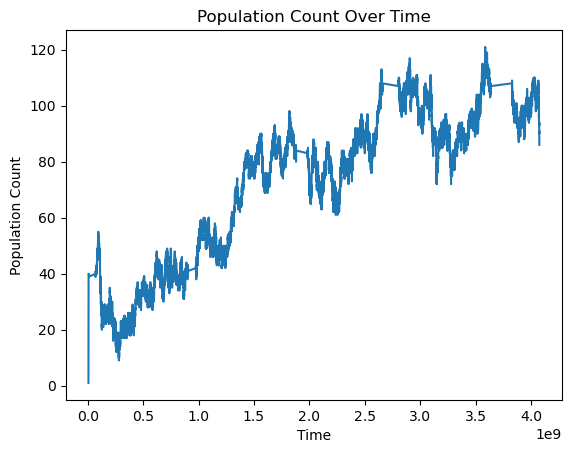

In [6]:
from matplotlib import pyplot as plt  # TODO Move to Lab
population_timeline = lab.get_temporal_data(simulation)
population_timeline.plot(y="population_count", legend=False)
plt.title('Population Count Over Time')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.show()

#### Spatial evolution

In [7]:
timestamps, positions = lab.get_spatial_data(simulation)

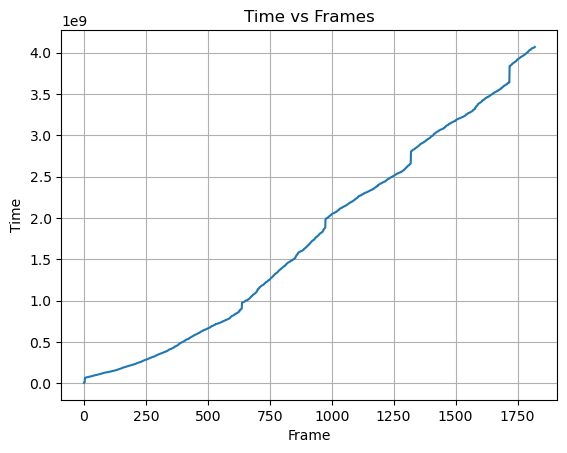

1821


In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(timestamps)), timestamps)
plt.xlabel('Frame')
plt.ylabel('Time')
plt.title('Time vs Frames')
plt.grid(True)
plt.show()
print(len(positions))

#### Actions

In [9]:
timeline = lab.get_timeline(simulation)

splitted_timeline = []
for i in range(len(timestamps) - 1):
    splitted_timeline.append([
        a for a in timeline if
        timestamps[i] <= a["action_time"] and
        a["action_time"] < timestamps[i+1]
    ])

In [11]:
import json

with open('results/positions.json', 'w') as json_file:
    json.dump(positions, json_file)

timestamps[-1] = "END"
with open('results/timestamps.json', 'w') as json_file:
    json.dump(timestamps, json_file)

with open('results/timeline.json', 'w') as json_file:
    json.dump(splitted_timeline, json_file)

In [12]:
agents_data = lab.get_agents_data(simulation)

In [14]:
with open('results/agents_data.json', 'w') as json_file:
    json.dump(agents_data, json_file)